<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/mlp_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Use plot styling from seaborn.
  sns.set(style="darkgrid")
  # Increase the plot size and font size.
  sns.set(font_scale=1.5)
  plt.rcParams["figure.figsize"] = (12, 6)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 6s 14ms/step - loss: 0.6743 - accuracy: 0.5633 - val_loss: 0.3098 - val_accuracy: 0.8672
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.2257 - accuracy: 0.9144 - val_loss: 0.2875 - val_accuracy: 0.8748
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0799 - accuracy: 0.9782 - val_loss: 0.3828 - val_accuracy: 0.8652
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0159 - accuracy: 0.9979 - val_loss: 0.4841 - val_accuracy: 0.8520
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0029 - accuracy: 0.9999 - val_loss: 0.5337 - val_accuracy: 0.8604
Epoch 6/100
176/176 [==============================] - 2s 12ms/step - loss: 8.5308e-04 - accuracy: 1.0000 - val_loss: 0.5657 - val_accuracy: 0.8584
Epoch 7/100
176/176 [==============================] - 2s 12ms/step - loss: 4.6646e-04 - accuracy: 1.0000 - val_los

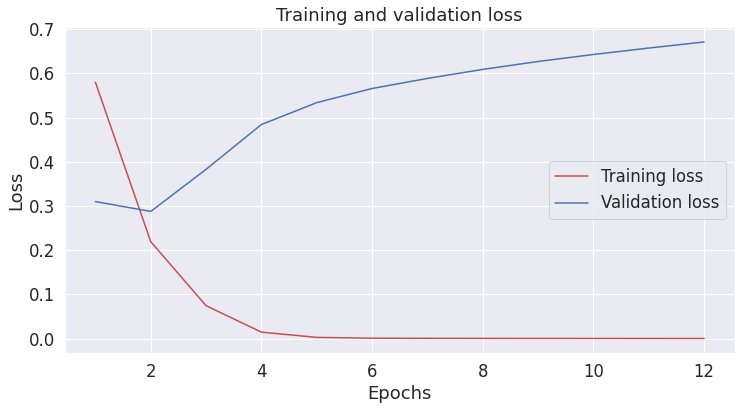

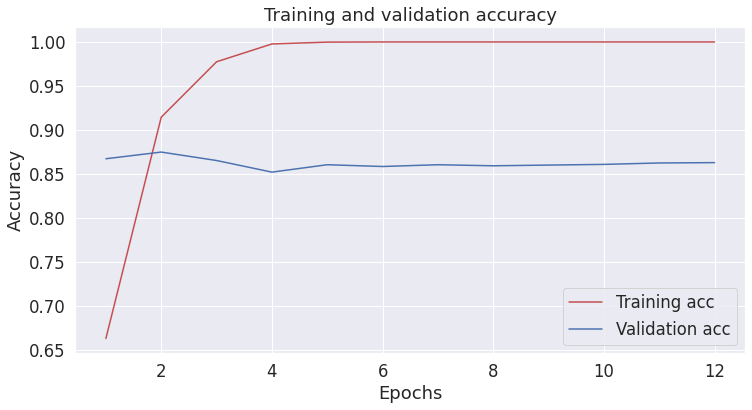

              precision    recall  f1-score   support

           0      0.881     0.871     0.876     12500
           1      0.872     0.882     0.877     12500

    accuracy                          0.876     25000
   macro avg      0.876     0.876     0.876     25000
weighted avg      0.876     0.876     0.876     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 3s 13ms/step - loss: 0.6283 - accuracy: 0.6104 - val_loss: 0.3032 - val_accuracy: 0.8656
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1883 - accuracy: 0.9305 - val_loss: 0.3233 - val_accuracy: 0.8768
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0582 - accuracy: 0.9866 - val_loss: 0.3828 - val_accuracy: 0.8740
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0101 - accuracy: 0.9994 - val_loss: 0.4716 - val_accuracy: 0.8748
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0

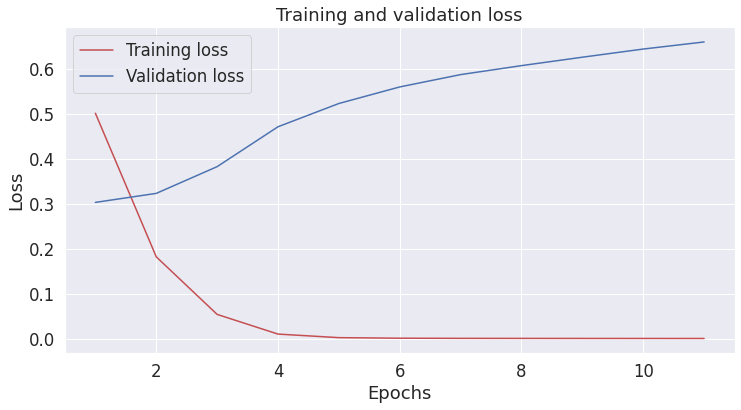

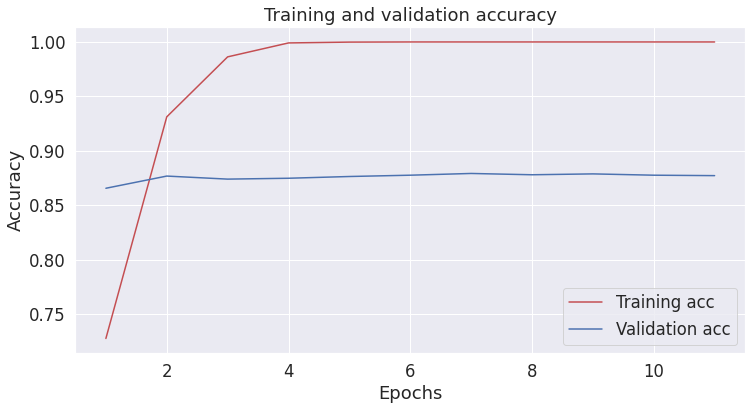

              precision    recall  f1-score   support

           0      0.862     0.890     0.876     12500
           1      0.887     0.858     0.872     12500

    accuracy                          0.874     25000
   macro avg      0.875     0.874     0.874     25000
weighted avg      0.875     0.874     0.874     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 3s 13ms/step - loss: 0.6061 - accuracy: 0.6325 - val_loss: 0.2880 - val_accuracy: 0.8768
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1750 - accuracy: 0.9394 - val_loss: 0.3061 - val_accuracy: 0.8728
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0536 - accuracy: 0.9885 - val_loss: 0.3639 - val_accuracy: 0.8768
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0112 - accuracy: 0.9986 - val_loss: 0.4522 - val_accuracy: 0.8764
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

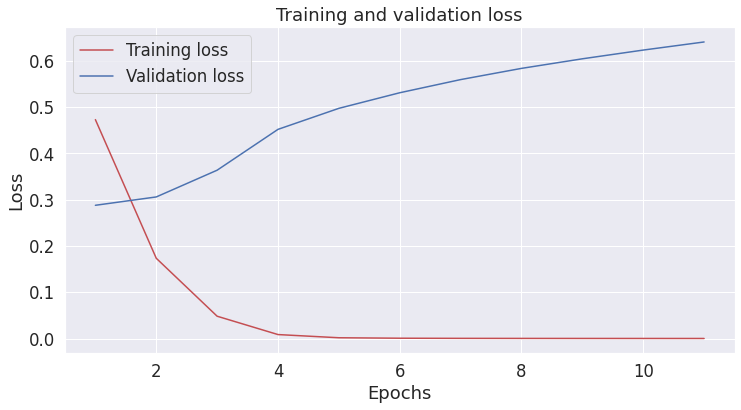

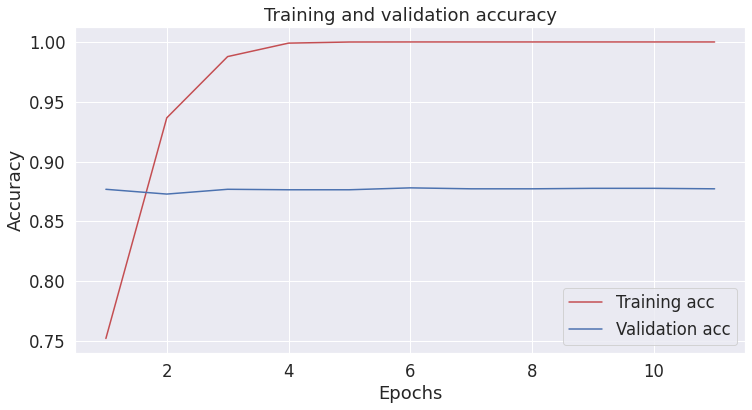

              precision    recall  f1-score   support

           0      0.896     0.844     0.869     12500
           1      0.853     0.902     0.877     12500

    accuracy                          0.873     25000
   macro avg      0.874     0.873     0.873     25000
weighted avg      0.874     0.873     0.873     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 3s 13ms/step - loss: 0.6070 - accuracy: 0.6354 - val_loss: 0.3192 - val_accuracy: 0.8660
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1871 - accuracy: 0.9306 - val_loss: 0.3243 - val_accuracy: 0.8700
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0689 - accuracy: 0.9819 - val_loss: 0.4235 - val_accuracy: 0.8652
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0139 - accuracy: 0.9982 - val_loss: 0.4811 - val_accuracy: 0.8684
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0

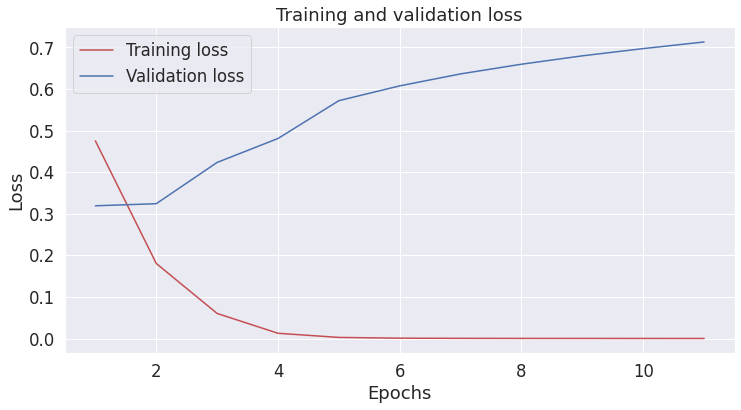

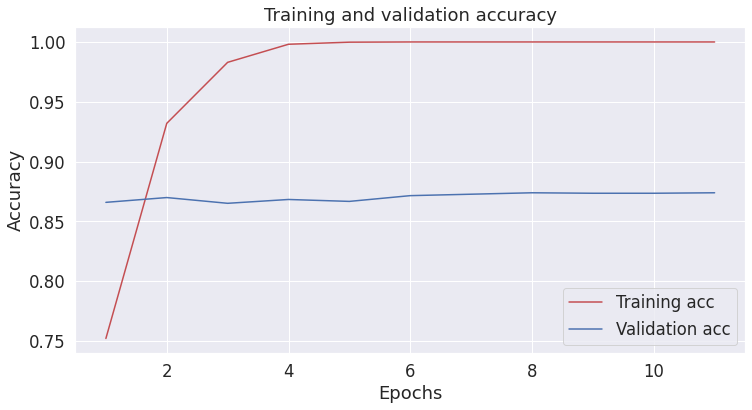

              precision    recall  f1-score   support

           0      0.828     0.926     0.874     12500
           1      0.916     0.808     0.858     12500

    accuracy                          0.867     25000
   macro avg      0.872     0.867     0.866     25000
weighted avg      0.872     0.867     0.866     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 3s 13ms/step - loss: 0.6532 - accuracy: 0.5933 - val_loss: 0.3032 - val_accuracy: 0.8660
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2090 - accuracy: 0.9182 - val_loss: 0.3006 - val_accuracy: 0.8712
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0735 - accuracy: 0.9802 - val_loss: 0.3780 - val_accuracy: 0.8628
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0178 - accuracy: 0.9976 - val_loss: 0.4636 - val_accuracy: 0.8624
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

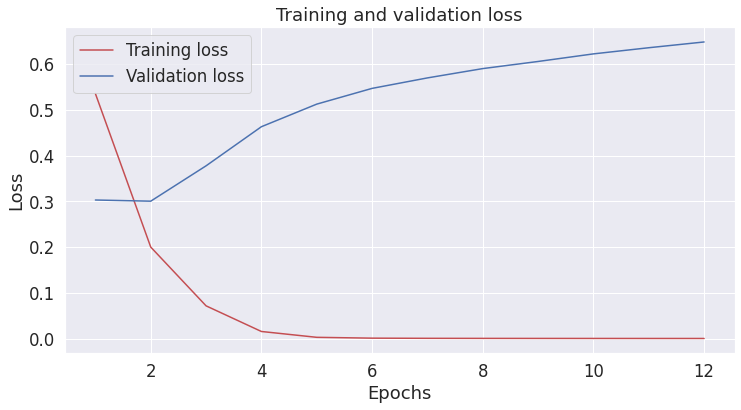

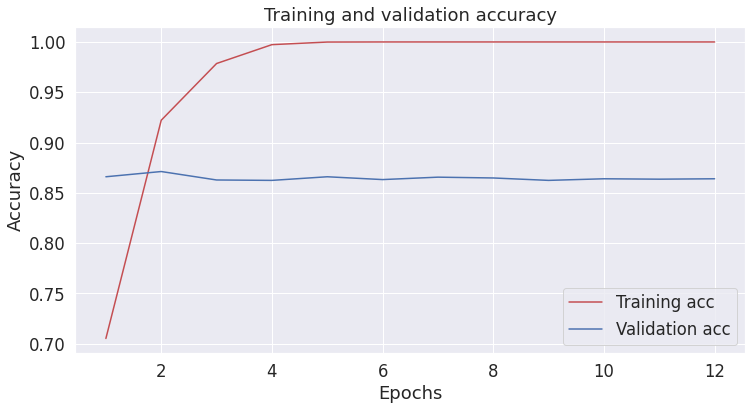

              precision    recall  f1-score   support

           0      0.895     0.846     0.870     12500
           1      0.854     0.901     0.877     12500

    accuracy                          0.873     25000
   macro avg      0.874     0.873     0.873     25000
weighted avg      0.874     0.873     0.873     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6108 - accuracy: 0.6326 - val_loss: 0.2934 - val_accuracy: 0.8776
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1783 - accuracy: 0.9355 - val_loss: 0.2963 - val_accuracy: 0.8776
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0633 - accuracy: 0.9836 - val_loss: 0.3601 - val_accuracy: 0.8676
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0117 - accuracy: 0.9984 - val_loss: 0.4497 - val_accuracy: 0.8668
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

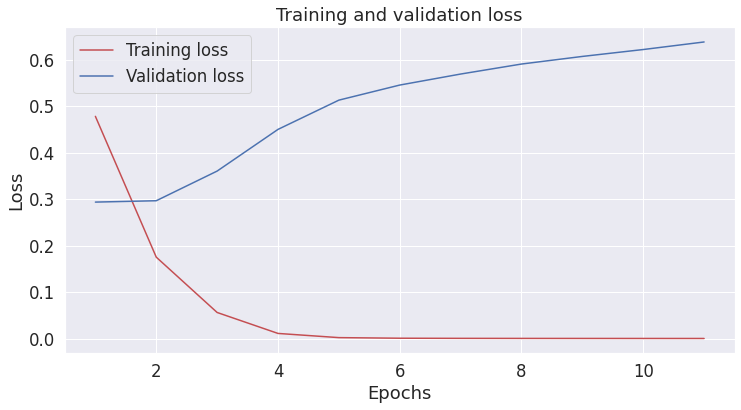

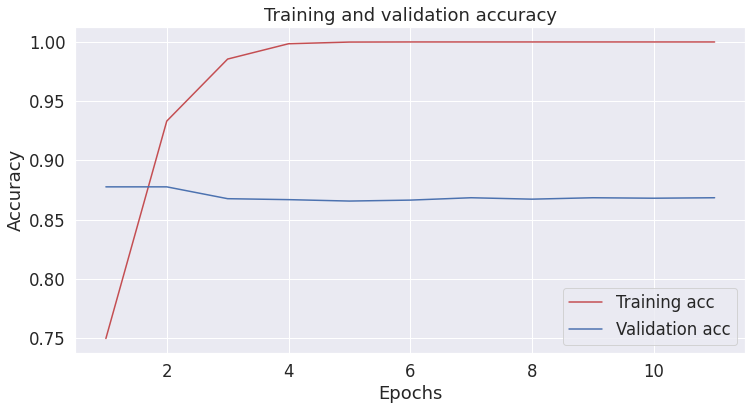

              precision    recall  f1-score   support

           0      0.882     0.868     0.875     12500
           1      0.870     0.884     0.877     12500

    accuracy                          0.876     25000
   macro avg      0.876     0.876     0.876     25000
weighted avg      0.876     0.876     0.876     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.5994 - accuracy: 0.6362 - val_loss: 0.2977 - val_accuracy: 0.8816
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1667 - accuracy: 0.9402 - val_loss: 0.3140 - val_accuracy: 0.8792
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0490 - accuracy: 0.9889 - val_loss: 0.3962 - val_accuracy: 0.8744
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0095 - accuracy: 0.9993 - val_loss: 0.4968 - val_accuracy: 0.8720
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

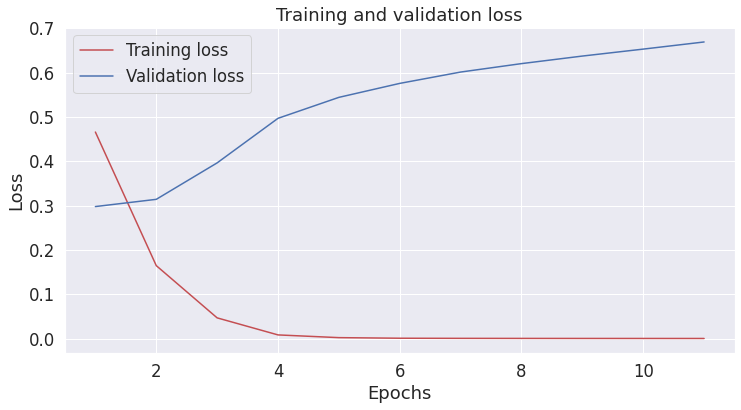

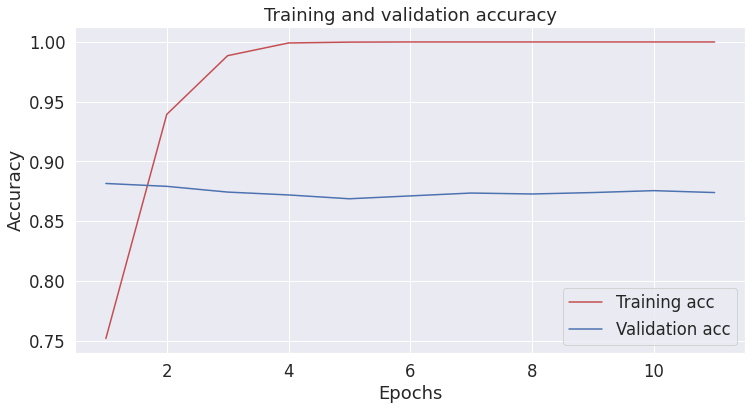

              precision    recall  f1-score   support

           0      0.898     0.841     0.868     12500
           1      0.850     0.905     0.877     12500

    accuracy                          0.873     25000
   macro avg      0.874     0.873     0.873     25000
weighted avg      0.874     0.873     0.873     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6097 - accuracy: 0.6264 - val_loss: 0.2872 - val_accuracy: 0.8868
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1748 - accuracy: 0.9368 - val_loss: 0.3010 - val_accuracy: 0.8788
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0584 - accuracy: 0.9854 - val_loss: 0.3558 - val_accuracy: 0.8792
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0126 - accuracy: 0.9989 - val_loss: 0.4654 - val_accuracy: 0.8752
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

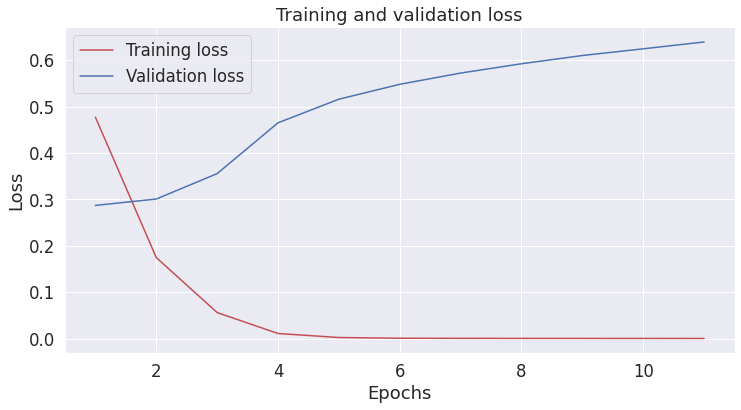

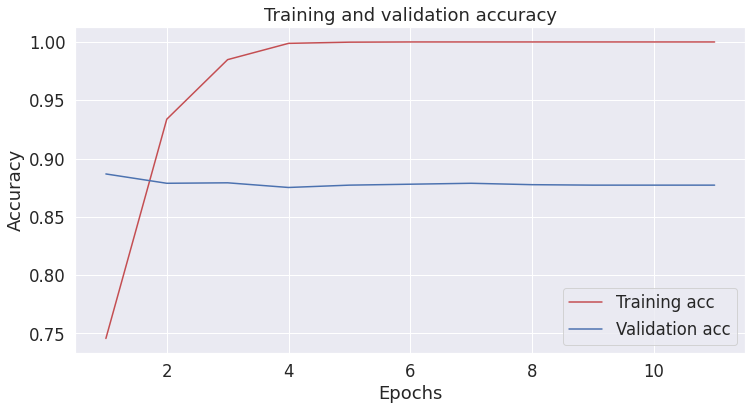

              precision    recall  f1-score   support

           0      0.869     0.883     0.876     12500
           1      0.881     0.867     0.874     12500

    accuracy                          0.875     25000
   macro avg      0.875     0.875     0.875     25000
weighted avg      0.875     0.875     0.875     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6176 - accuracy: 0.6234 - val_loss: 0.3040 - val_accuracy: 0.8704
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1685 - accuracy: 0.9389 - val_loss: 0.3102 - val_accuracy: 0.8708
Epoch 3/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0498 - accuracy: 0.9896 - val_loss: 0.4049 - val_accuracy: 0.8636
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0106 - accuracy: 0.9990 - val_loss: 0.4760 - val_accuracy: 0.8672
Epoch 5/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0

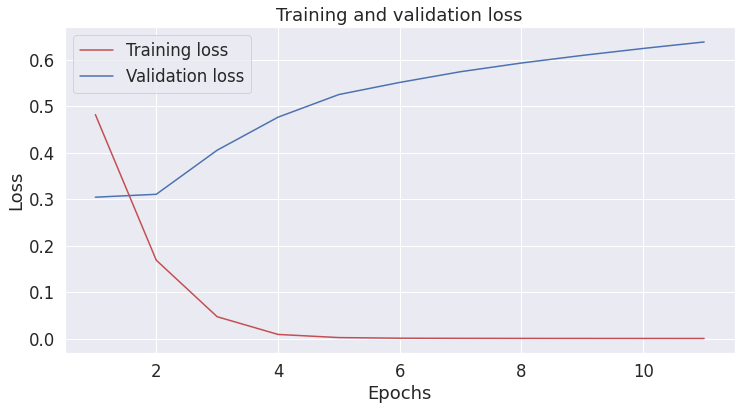

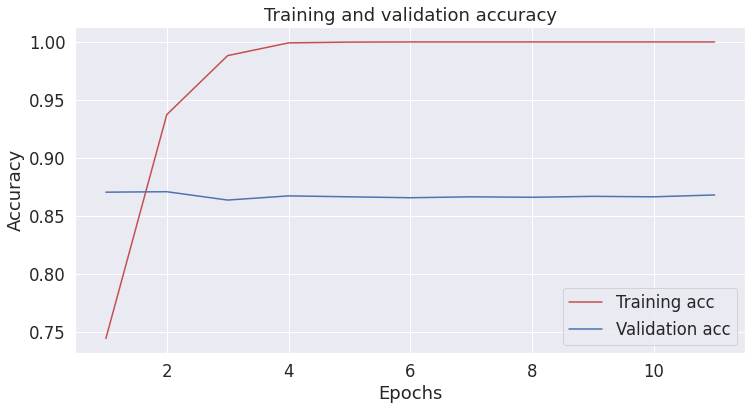

              precision    recall  f1-score   support

           0      0.849     0.903     0.875     12500
           1      0.897     0.839     0.867     12500

    accuracy                          0.871     25000
   macro avg      0.873     0.871     0.871     25000
weighted avg      0.873     0.871     0.871     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6103 - accuracy: 0.6317 - val_loss: 0.2891 - val_accuracy: 0.8800
Epoch 2/100
176/176 [==============================] - 2s 14ms/step - loss: 0.1766 - accuracy: 0.9357 - val_loss: 0.2968 - val_accuracy: 0.8836
Epoch 3/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0508 - accuracy: 0.9887 - val_loss: 0.3776 - val_accuracy: 0.8820
Epoch 4/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0095 - accuracy: 0.9992 - val_loss: 0.4756 - val_accuracy: 0.8744
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.

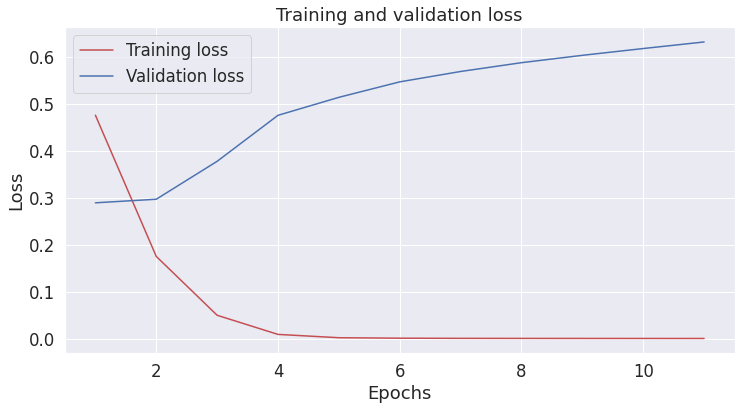

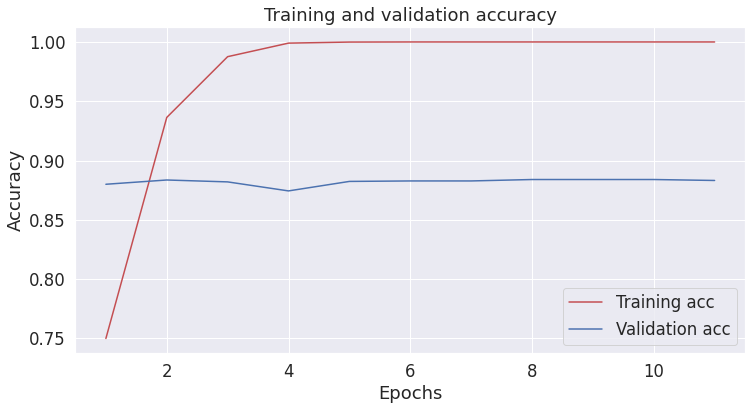

              precision    recall  f1-score   support

           0      0.891     0.856     0.873     12500
           1      0.862     0.896     0.878     12500

    accuracy                          0.876     25000
   macro avg      0.876     0.876     0.876     25000
weighted avg      0.876     0.876     0.876     25000


Average accuracy: 0.8734 (+/- 0.0028)
Average loss: 0.2989 (+/- 0.0053)
Average F1: 0.8734 (+/- 0.0059)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []

for n, (train, valid) in enumerate(kfold.split(x_train, y_train)):

  print("KFold: {} starts.".format(n + 1))
  del model
  tf.keras.backend.clear_session()

  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Flatten(),
    # Hidden layers
    Dense(units=250, activation="relu"),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_train[valid], y_train[valid]),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_test, y=y_test, verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_test) > 0.5).astype("int32")
  report = classification_report(y_true=y_test, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_test, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
